<a href="https://colab.research.google.com/github/czhurdlespeed/TFDevCert/blob/main/TFCert_Practice/03_introduction_to_computer_vision_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN and Computer Vision with TensorFlow

## Get the data

The images we're working with are from [Kaggle Food101 dataset](https://www.kaggle.com/datasets/dansbecker/food-101)

We have modified the dataset to use only pizza and steak

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-28 14:59:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   134MB/s    in 0.8s    

2023-12-28 14:59:08 (134 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

Visualizing many samples of data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [4]:
import os

# Walk through pizza_steak directory and count number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [5]:
# Another way to find out how many images in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first get the class names programmatically

In [6]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up target directory
  target_folder = target_dir + "/" + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in image and plot
  image = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {image.shape}") # show the shape of the image
  return image


Image shape: (512, 512, 3)


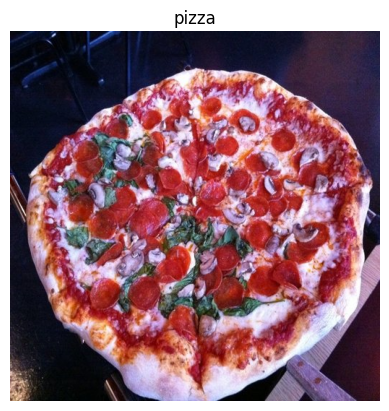

In [8]:
img = view_random_image("pizza_steak/train", "pizza")

In [9]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  7,   7,  15],
        [  6,   6,  14],
        [  6,   6,  14],
        ...,
        [ 34,  31,  58],
        [ 36,  33,  60],
        [ 38,  35,  62]],

       [[  8,   8,  16],
        [  8,   8,  16],
        [  9,   9,  17],
        ...,
        [ 34,  31,  58],
        [ 32,  29,  56],
        [ 31,  28,  55]],

       [[  9,   8,  14],
        [ 10,   9,  15],
        [ 11,  10,  18],
        ...,
        [ 34,  31,  58],
        [ 31,  28,  55],
        [ 28,  25,  52]],

       ...,

       [[110,  72,  49],
        [ 96,  58,  35],
        [104,  67,  41],
        ...,
        [ 54,  20,  34],
        [ 56,  22,  38],
        [ 53,  19,  35]],

       [[143, 105,  84],
        [100,  62,  39],
        [117,  80,  54],
        ...,
        [ 50,  18,  31],
        [ 51,  19,  34],
        [ 48,  15,  32]],

       [[158, 120,  99],
        [121,  83,  60],
        [159, 121,  98],
        ...,
        [ 47,  15,  2

In [10]:
# View shape
img.shape # width, heigh, color channels

(512, 512, 3)

In [11]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.02745098, 0.02745098, 0.05882353],
        [0.02352941, 0.02352941, 0.05490196],
        [0.02352941, 0.02352941, 0.05490196],
        ...,
        [0.13333333, 0.12156863, 0.22745098],
        [0.14117647, 0.12941176, 0.23529412],
        [0.14901961, 0.1372549 , 0.24313725]],

       [[0.03137255, 0.03137255, 0.0627451 ],
        [0.03137255, 0.03137255, 0.0627451 ],
        [0.03529412, 0.03529412, 0.06666667],
        ...,
        [0.13333333, 0.12156863, 0.22745098],
        [0.1254902 , 0.11372549, 0.21960784],
        [0.12156863, 0.10980392, 0.21568627]],

       [[0.03529412, 0.03137255, 0.05490196],
        [0.03921569, 0.03529412, 0.05882353],
        [0.04313725, 0.03921569, 0.07058824],
        ...,
        [0.13333333, 0.12156863, 0.22745098],
        [0.12156863, 0.10980392, 0.21568627],
        [0.10980392, 0.09803922, 0.20392157]],

       ...,

       [[0.43137255, 0.28235294, 0.19215686],
        [0.37647059, 0.22745098, 0.1372549 ],
        [0.40784314, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need way to:
* Load our images
* Preprocess our images
* Build a  CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size= 32,
                                               target_size=(224,224), class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir, batch_size=32,
                                               target_size = (224,224),class_mode = "binary",
                                               seed = 42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters =10, kernel_size = 3, activation = "relu", input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_1.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),
                        validation_data = valid_data, validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 16s 150ms/step - loss: 0.5809 - accuracy: 0.6900 - val_loss: 0.5145 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 7s 139ms/step - loss: 0.4641 - accuracy: 0.7913 - val_loss: 0.4672 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.4215 - accuracy: 0.8053 - val_loss: 0.3835 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.3992 - accuracy: 0.8253 - val_loss: 0.3290 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3756 - accuracy: 0.8420 - val_loss: 0.3587 - val_accuracy: 0.8340


> **Note:** If the cell is taking a long time to run, switch runtime to use GPU!

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before
Let's replicate a model we've built in a previous section to see if it work with our image data

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_2.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch = len(train_data),
                        validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 134ms/step - loss: 0.7845 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 143ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 168ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


> Peformance isn't good. Practically guessing. Stick with a CNN!!

In [16]:
# Dense model has a lot more parameters
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Let's try to improve model 2
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_3.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 114ms/step - loss: 2.1848 - accuracy: 0.6373 - val_loss: 0.5939 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 6s 134ms/step - loss: 0.8623 - accuracy: 0.7120 - val_loss: 1.0105 - val_accuracy: 0.6740
Epoch 3/5
47/47 [==============================] - 6s 135ms/step - loss: 0.7519 - accuracy: 0.7367 - val_loss: 0.6754 - val_accuracy: 0.6960
Epoch 4/5
47/47 [==============================] - 5s 111ms/step - loss: 0.5891 - accuracy: 0.7707 - val_loss: 0.7230 - val_accuracy: 0.6960
Epoch 5/5
47/47 [==============================] - 8s 165ms/step - loss: 0.8218 - accuracy: 0.7247 - val_loss: 0.6685 - val_accuracy: 0.7340


In [19]:
# Better than model 2 but still not better than the CNN model
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
